# Métodos

## Bisección

In [1]:
from math import *

def h(x):
    return (x-3)**3
    
def biseccion(f, intervalo, n):
    """
    PROPÓSITO: calcula el término *n* de la sucesión de                          bisección aplicada a *f* en *intervalo* y los extremos del mismo.
    PRECONDICIONES: f debe tener una única raíz en *intervalo*, ser continua     y f(a)f(b)< 0.
    PARÁMETROS:
        - f. función. La función involucrada.
        - intervalo. Lista =  [a, b]. 
        - n. Entero positivo. El índice del término de la                sucesión de bisección.
    """
    a, b = intervalo
    # inicializamos sucesión y contador
    xn =  a + (b-a)/2
    k =  1
    while k < n:
        if f(a)*f(xn)<0:
            b = xn
        else:
            a = xn
        # actualizamos sucesión y contador    
        xn =  a + (b-a)/2  
        k =  k + 1
    return a, b, xn
    
biseccion(h, [1, 4], 1)

(1, 4, 2.5)

# TAREA: Mejorar df_biseccion

In [2]:
import numpy as np
import pandas as pd

def df_biseccion(f, intervalo, cantidad_iteraciones):
    
    # Se puede mejorar
    sucesion_a =  np.array([biseccion(f, intervalo, n)[0] for n      in          range(1, cantidad_iteraciones)])
    sucesion_b = np.array([biseccion(f, intervalo, n)[1] for n       in          range(1, cantidad_iteraciones)])
    sucesion = np.array([biseccion(f, intervalo, n)[2] for n in                  range(1, cantidad_iteraciones)])

    columnas = zip(sucesion_a, sucesion_b, sucesion)
   
    tabla = pd.DataFrame(columnas, columns=["a", "b", "xn"])
    return tabla    
    

df_biseccion(h, [1,4], 10)




,a,b,xn
0,1.000000,4.000000,2.500000
1,2.500000,4.000000,3.250000
2,2.500000,3.250000,2.875000
3,2.875000,3.250000,3.062500
4,2.875000,3.062500,2.968750
5,2.968750,3.062500,3.015625
6,2.968750,3.015625,2.992188
7,2.992188,3.015625,3.003906
8,2.992188,3.003906,2.998047


In [3]:
test = df_biseccion(h, [1,4], 10)

test

,a,b,xn
0,1.000000,4.000000,2.500000
1,2.500000,4.000000,3.250000
2,2.500000,3.250000,2.875000
3,2.875000,3.250000,3.062500
4,2.875000,3.062500,2.968750
5,2.968750,3.062500,3.015625
6,2.968750,3.015625,2.992188
7,2.992188,3.015625,3.003906
8,2.992188,3.003906,2.998047


In [4]:
lista1 = [1, 2]
lista2 = ['A', 'B']

zipeado = zip(lista1, lista2)

for elemento in zipeado:
    print(elemento)

(1, 'A')
(2, 'B')


In [5]:
filtro = test.a > 0.9

test[filtro]


,a,b,xn
0,1.000000,4.000000,2.500000
1,2.500000,4.000000,3.250000
2,2.500000,3.250000,2.875000
3,2.875000,3.250000,3.062500
4,2.875000,3.062500,2.968750
5,2.968750,3.062500,3.015625
6,2.968750,3.015625,2.992188
7,2.992188,3.015625,3.003906
8,2.992188,3.003906,2.998047


<Axes: >

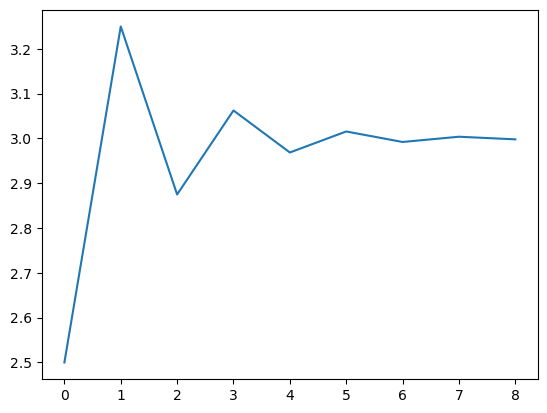

In [6]:
test.xn.plot()

# Criterio STOP

In [8]:
def h(x):
    return x**3
    
def biseccion_stop(f, intervalo, stop):
    """
    PROPÓSITO: calcula la sucesión de bisección aplicada a *f* en *intervalo* y los extremos del mismo hasta que se cumpla el criterio de stop inducido por *stop*.
    PRECONDICIONES: f debe tener una única raíz en *intervalo*, ser continua     y f(a)f(b)< 0.
    PARÁMETROS:
        - f. función. La función involucrada.
        - intervalo. Lista =  [a, b]. 
        - n. Entero positivo. El índice del término de la                sucesión de bisección.
    """
    a, b = intervalo
    # inicializamos sucesión y contador
    xn1 =  a + (b-a)/2
    xn = 1
    k =  1
    
    while abs((xn1 - xn)/xn1) > stop:
        print(abs((xn1 - xn)/xn1))
        if f(a)*f(xn1)<0:
            b = xn1
        else:
            a = xn1
        # actualizamos sucesión y contador    
        xn = xn1
        xn1 =  a + (b-a)/2  
        k =  k + 1
        print(xn1, xn)
    return a, b, xn1


biseccion_stop(h,  [1, 4], 0.1)

0.6
3.25 2.5
0.23076923076923078
3.625 3.25
0.10344827586206896
3.8125 3.625


(3.625, 4, 3.8125)

# TAREA: ¿Es cierto que si $f$ tiene un único cero en $x=0 \in [a, b]$ y $f(a)f(b) < 0$, entonces el criterio de aproximación de error  relativo

# $\left|\frac{x_{n+1} - x_{n}}{x_{n+1}}\right|$

# falla?